In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import the required libraries

In [ ]:
# LoadING the dataset:

In [2]:
df=pd.read_csv("C:\walmart.txt")

In [ ]:
# Exploreing the dataset:

In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [4]:
df.shape,df.dtypes

((550068, 10),
 User_ID                        int64
 Product_ID                    object
 Gender                        object
 Age                           object
 Occupation                     int64
 City_Category                 object
 Stay_In_Current_City_Years    object
 Marital_Status                 int64
 Product_Category               int64
 Purchase                       int64
 dtype: object)

In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Performing visual analysis (univariate and bivariate):

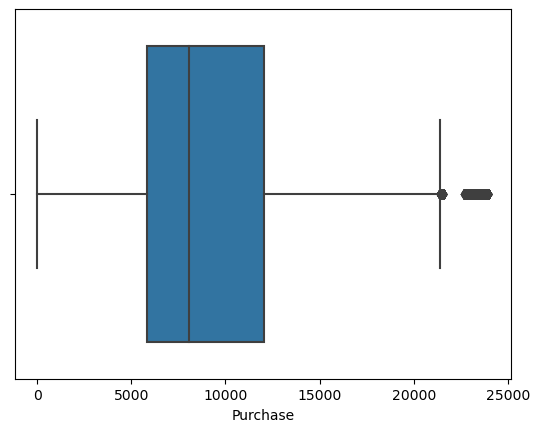

In [7]:
sns.boxplot(x=df.Purchase)
plt.show()

# "Difference between mean and median"

In [8]:
df.Purchase.mean()-df.Purchase.median()

1216.9687129591257

In [9]:
average_female_expenses=df[df['Gender'] == 'F']['Purchase'].mean()
average_female_expenses

8734.565765155476

In [10]:
average_male_expenses=df[df["Gender"] == "M"]["Purchase"].mean()
average_male_expenses

9437.526040472265

In [11]:
if average_male_expenses>average_female_expenses:
    print("Male spend more than women")
else:
    print("Women spend more than man")

Male spend more than women


# sample size and desired confidence level:

In [12]:
sample_size=1000
confidance_interval=0.95

In [13]:
female_sample=df[df["Gender"]== "F"].sample(n=sample_size,random_state=1)
female_sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
291832,1003017,P00003242,F,36-45,9,B,1,0,8,7958
170662,1002309,P00027542,F,46-50,0,C,2,1,8,7902
409749,1003091,P00324442,F,26-35,0,C,1,1,11,5930
508399,1000305,P00123142,F,18-25,0,B,3,1,11,4604
498141,1004674,P00110742,F,36-45,7,C,1,1,1,15365
...,...,...,...,...,...,...,...,...,...,...
220964,1004044,P00229342,F,36-45,3,B,1,0,5,6856
363546,1001938,P00030542,F,26-35,2,C,1,1,3,5345
254524,1003304,P00191642,F,46-50,5,B,1,1,3,13694
530909,1003770,P00119442,F,36-45,3,C,1,1,5,8801


In [14]:
male_sample = df[df['Gender'] == 'M'].sample(n=sample_size, random_state=1)
male_sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
340812,1004433,P00116142,M,26-35,0,B,1,1,10,18514
6220,1001013,P00278642,M,55+,13,C,1,0,5,8748
233604,1006023,P00016742,M,26-35,0,C,2,1,1,11436
274046,1000215,P00169742,M,36-45,14,C,1,1,1,15468
187350,1004922,P00216342,M,18-25,17,C,1,0,3,10629
...,...,...,...,...,...,...,...,...,...,...
367498,1002590,P00226742,M,18-25,4,A,0,0,11,7563
47739,1001320,P00029542,M,26-35,4,A,2,0,1,8317
145868,1004473,P00345842,M,36-45,1,B,3,0,2,9884
523986,1002761,P00100842,M,36-45,6,B,0,0,5,6946


In [15]:
female_mean=female_sample.Purchase.mean()
female_mean

8935.672

In [16]:
male_mean=male_sample.Purchase.mean()
male_mean

9506.045

In [17]:
female_std=female_sample.Purchase.std()
female_std

4850.300823298748

In [18]:
male_std=male_sample.Purchase.std()
male_std

5092.729453275454

In [19]:
margin_error_male=1.96*(male_std/np.sqrt(sample_size))
margin_error_male

315.6506417557401

In [20]:
margin_error_female=1.96*(female_std/np.sqrt(sample_size))
margin_error_female

300.624759596833

In [21]:
confidance_interval_female = (female_mean - margin_error_female, female_mean + margin_error_female)
confidance_interval_female


(8635.047240403168, 9236.296759596833)

In [22]:
confidance_interval_male = (male_mean - margin_error_male, male_mean + margin_error_male)
confidance_interval_male

(9190.39435824426, 9821.69564175574)

In [23]:
if confidance_interval_male[0] > confidance_interval_female[1] or confidance_interval_female[0] > confidance_interval_male[1]:
     print("The confidence intervals of average male and female spending do not overlap.")
else:
    print("The confidence intervals of average male and female spending overlap.")

The confidence intervals of average male and female spending overlap.


In [24]:
avg_married_expenses = df[df.Marital_Status == True]["Purchase"].mean()
avg_married_expenses

9261.174574082374

In [25]:
avg_unmarried_expenses = df[df.Marital_Status == False]["Purchase"].mean()
avg_unmarried_expenses


9265.907618921507

In [26]:
if avg_married_expenses > avg_unmarried_expenses:
    print("Married customers spend more money per transaction than unmarried customers.")
else:
    print("There is no significant difference in spending habits between married and unmarried customers.")

There is no significant difference in spending habits between married and unmarried customers.


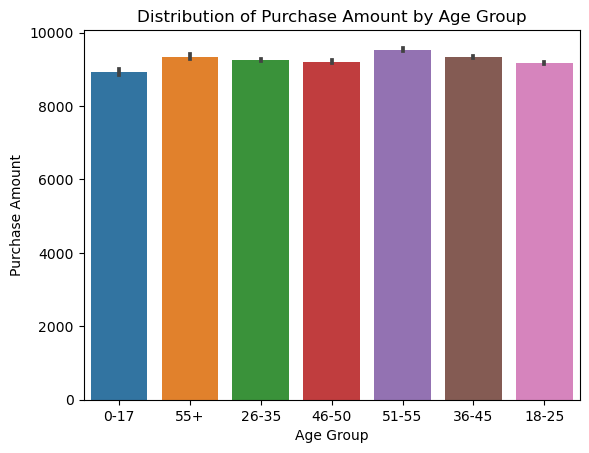

In [27]:
sns.barplot(x=df['Age'], y=df['Purchase'])
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.title("Distribution of Purchase Amount by Age Group")
plt.show()

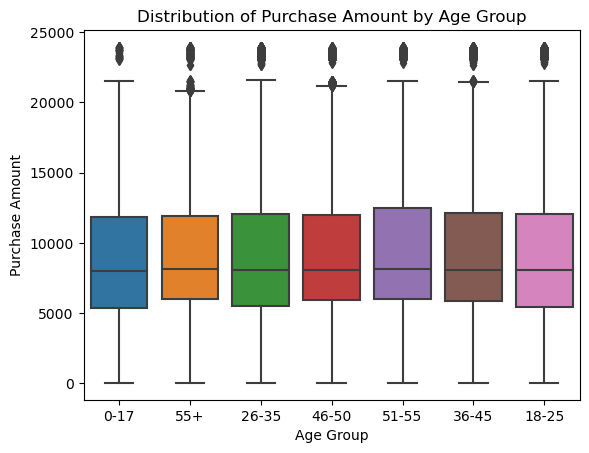

In [28]:
sns.boxplot(x=df['Age'], y=df['Purchase'])
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.title("Distribution of Purchase Amount by Age Group")
plt.show()

In [29]:

def convert_age_interval(age_interval):
    if '+' in age_interval:
        lower_limit = int(age_interval.split('+')[0])
        return lower_limit
    else:
        lower_limit, upper_limit = map(int, age_interval.split('-'))
        return (lower_limit + upper_limit) // 2


df['Age'] = df['Age'].apply(convert_age_interval)


In [30]:
print(df)

        User_ID Product_ID Gender  Age  Occupation City_Category  \
0       1000001  P00069042      F    8          10             A   
1       1000001  P00248942      F    8          10             A   
2       1000001  P00087842      F    8          10             A   
3       1000001  P00085442      F    8          10             A   
4       1000002  P00285442      M   55          16             C   
...         ...        ...    ...  ...         ...           ...   
550063  1006033  P00372445      M   53          13             B   
550064  1006035  P00375436      F   30           1             C   
550065  1006036  P00375436      F   30          15             B   
550066  1006038  P00375436      F   55           1             C   
550067  1006039  P00371644      F   48           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                      

C:\Users\criss\AppData\Local\Temp\ipykernel_11076\439454894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


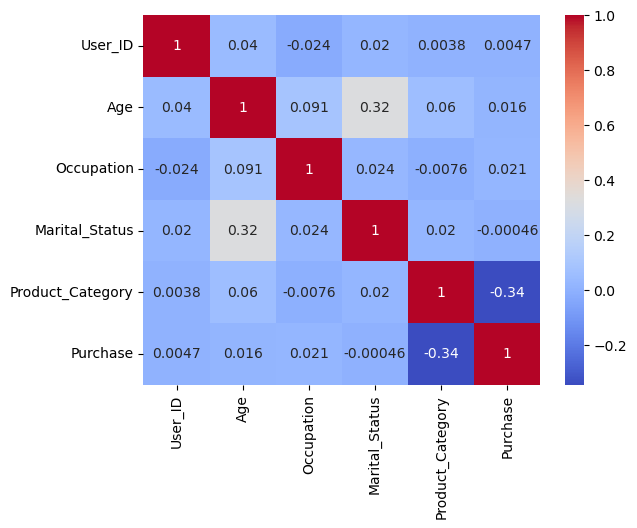

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

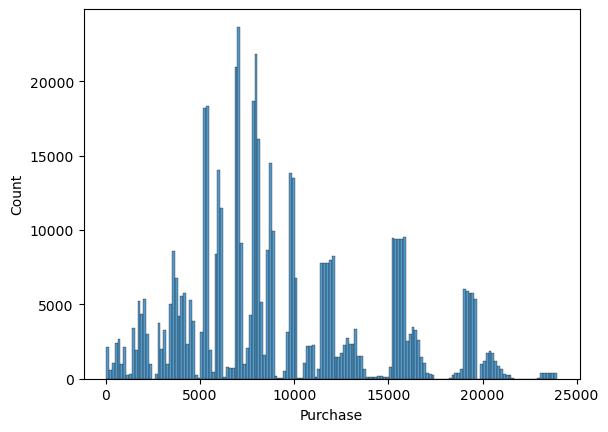

In [32]:
sns.histplot(df['Purchase'])
plt.show()

# INSIGHT

# Men tend to spend more money per transaction than men.



# The confidence intervals of average male and female spending do overlap, indicating significant similarity in spending habits.

# MARRIED PEOPLE SPEND A LITTLE MORE THAN UNMARRIED PEOPLES.

Recommendations:
Walmart can focus on tailoring marketing and promotional strategies to attract and engage male customers, leveraging their tendency to spend more.
Based on the differences in spending habits, Walmart can customize product offerings and store layouts to cater to different customer segments.
Analyze the impact of marital status and age on purchasing behavior and explore targeted approaches to enhance customer satisfaction and loyalty.
Remember to include detailed explanations and supporting evidence for your insights and recommendations.